In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from benchmarks.generator import get_revenue_behaviour, get_revenue_behaviour_deprecated
from benchmarks.robin_railway import RevenueMaximization
from benchmarks.utils import sns_box_plot, sns_line_plot, int_input, get_schedule_from_supply, infer_line_stations, get_services_by_tsp_df, plot_marey_chart
from src.entities import GSA, Solution

from robin.scraping.entities import SupplySaver
from robin.services_generator.entities import ServiceGenerator
from robin.supply.entities import Service, Supply

from pathlib import Path
from typing import Any, List, Mapping, Tuple, Union
import shutil

In [2]:
# Config files
supply_config_path = Path("../configs/generator/supply_config.yml")
demand_config_path = Path("../configs/demand/demand.yml")
generator_config_path = Path("../configs/generator/generator_config.yml")

# Save paths
generator_save_path = Path(f'../data/generator/supply_dummy.yml')
supply_save_path = '../configs/mealpy/'
robin_save_path = '../data/output/robin/'
figures = '../figures/'

# Clean save paths directories
if Path(generator_save_path.parent).exists():
    shutil.rmtree(generator_save_path.parent)

Path(generator_save_path.parent).mkdir(parents=True)

if Path(supply_save_path).exists():
    shutil.rmtree(supply_save_path)
    
Path(supply_save_path).mkdir(parents=True)

if Path(figures).exists():
    shutil.rmtree(figures)

Path(figures).mkdir(parents=True)

In [3]:
seed = 21

if generator_config_path:
    n_services = int_input("Number of services to generate: ")
    generator = ServiceGenerator(supply_config_path=supply_config_path)
    _ = generator.generate(file_name=generator_save_path,
                           path_config=generator_config_path,
                           n_services=n_services,
                           seed=seed)
    print(f'Number of service requests generated: {len(_)}')

Number of service requests generated: 25


In [4]:
supply = Supply.from_yaml('../data/supply_mealpy.yml')
tsp_df = get_services_by_tsp_df(supply.services)

print(tsp_df)

           Number of Services
Service 1                   1
Service 2                   1
Service 3                   1
Total                       3


In [5]:
print("Services: ", len(supply.services))
requested_schedule = get_schedule_from_supply(generator_save_path)
revenue_behaviour = get_revenue_behaviour_deprecated(supply)
lines = supply.lines
line = infer_line_stations(lines)

Services:  3


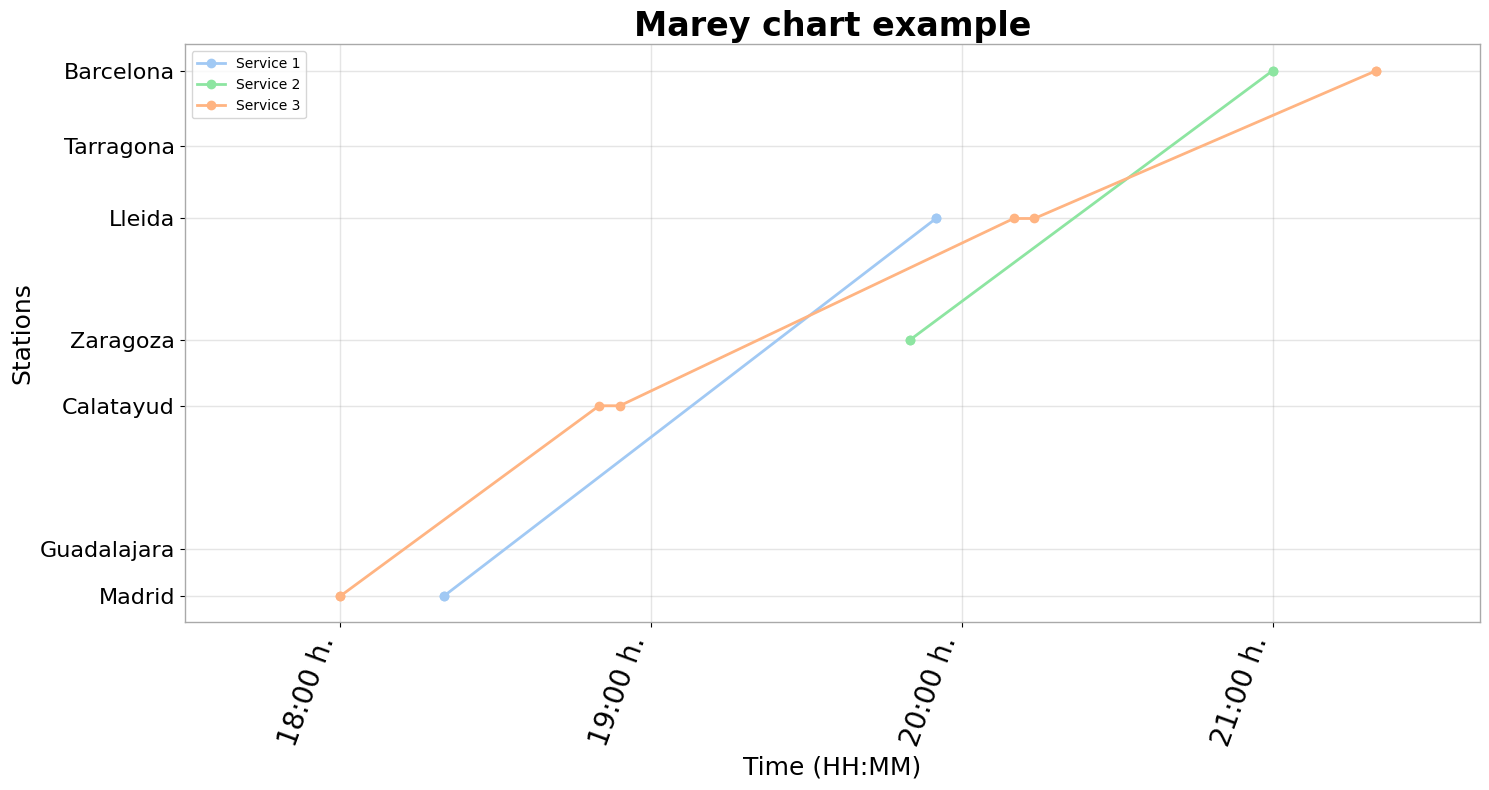

In [6]:
plot_marey_chart(requested_supply=supply,
                 colors_by_tsp=True, 
                 main_title="Marey chart example",
                 plot_security_gaps=False,
                 x_limits = (1050, 1300),
                 save_path=Path('../figures/marey_chart_example.pdf'))

/Users/david/PycharmProjects/GSA_M/venv/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


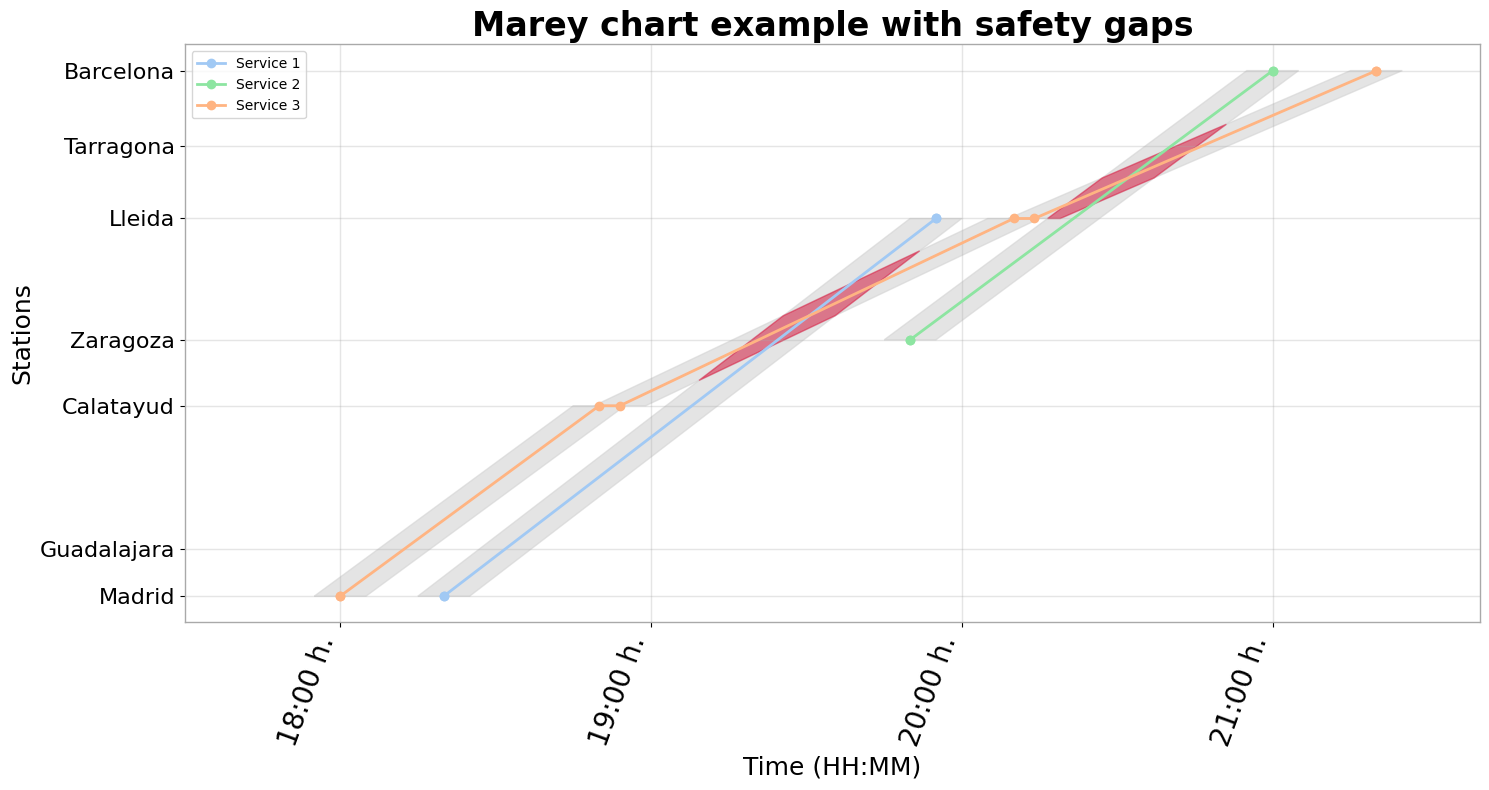

In [7]:
plot_marey_chart(requested_supply=supply,
                 colors_by_tsp=True, 
                 main_title="Marey chart example with safety gaps",
                 plot_security_gaps=True,
                 security_gap=5,
                 x_limits = (1050, 1300),
                 save_path=Path('../figures/marey_chart_example_gaps.pdf'))

In [8]:
supply_opti = Supply.from_yaml('../data/supply_mealpy_opti.yml')
tsp_df = get_services_by_tsp_df(supply_opti.services)

print(tsp_df)

           Number of Services
Service 1                   1
Service 2                   1
Service 3                   1
Total                       3


In [9]:
print("Services: ", len(supply_opti.services))
requested_schedule_opti = get_schedule_from_supply(generator_save_path)
revenue_behaviour_opti = get_revenue_behaviour_deprecated(supply_opti)
lines_opti = supply_opti.lines
line_opti = infer_line_stations(lines_opti)

Services:  3


/Users/david/PycharmProjects/GSA_M/venv/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


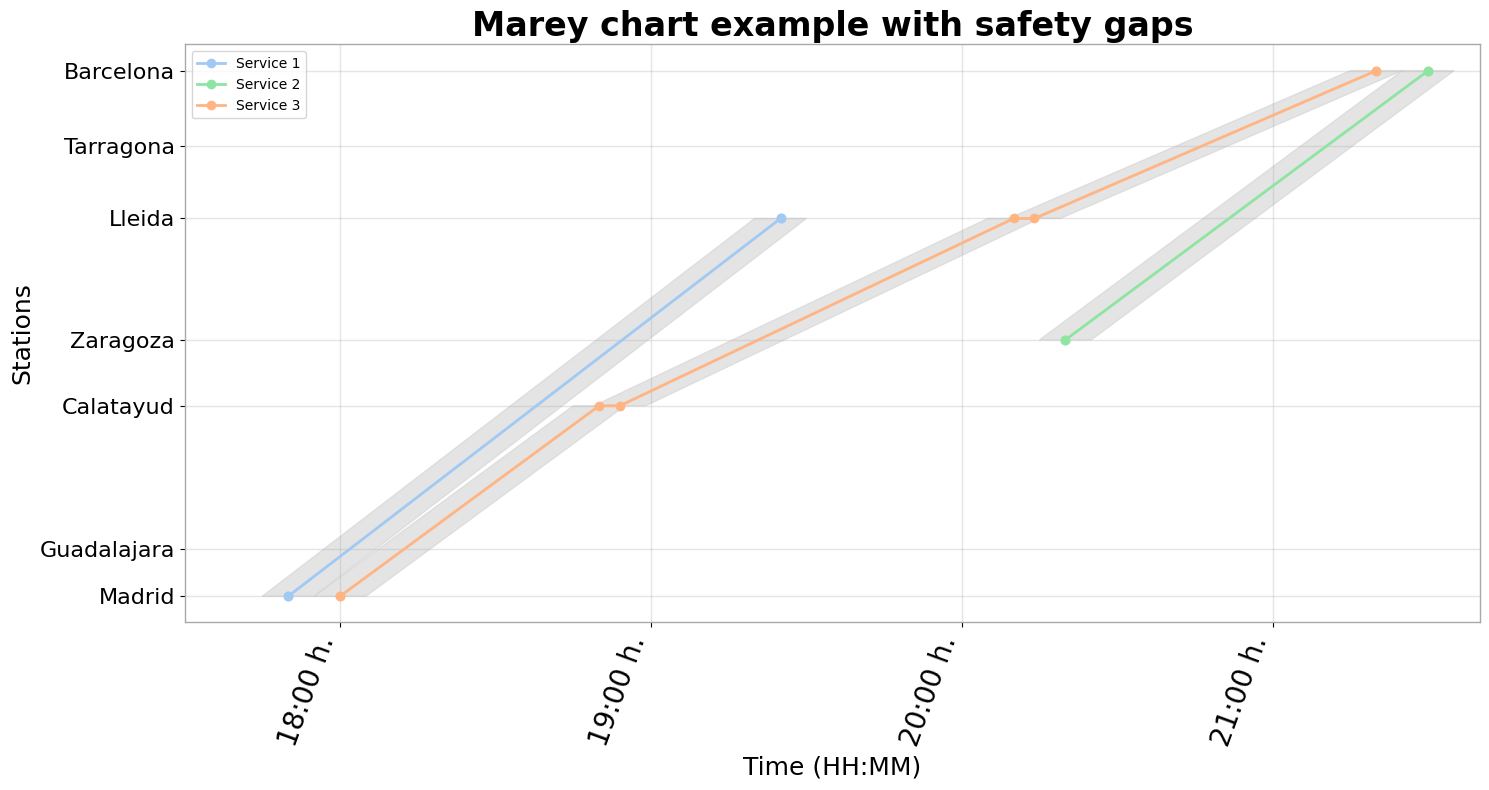

In [10]:
plot_marey_chart(requested_supply=supply_opti,
                 colors_by_tsp=True,
                 main_title="Marey chart example with safety gaps",
                 plot_security_gaps=True,
                 security_gap=5,
                 x_limits=(1050, 1300),
                 save_path=Path('../figures/marey_chart_example_gaps_optimized.pdf'))

In [14]:
for service in supply.services:
    print("Service: ", service.id)
    for dt, _ in service.schedule:
        # Extraer horas y minutos
        horas_totales = dt.total_seconds() // 3600
        minutos = (dt.total_seconds() % 3600) // 60
        
        # Formatear como HH:MM
        formato_horas = f"{int(horas_totales):02}:{int(minutos):02}"
        print(formato_horas)

Service:  0_2024-06-25-18.00
18:20
19:55
Service:  1_2024-06-25-18.20
19:50
21:00
Service:  2_2024-06-25-19.50
18:00
18:50
20:10
21:20


In [15]:
for service in supply_opti.services:
    print("Service: ", service.id)
    for dt, _ in service.schedule:
        # Extraer horas y minutos
        horas_totales = dt.total_seconds() // 3600
        minutos = (dt.total_seconds() % 3600) // 60
        
        # Formatear como HH:MM
        formato_horas = f"{int(horas_totales):02}:{int(minutos):02}"
        print(formato_horas)

Service:  0_2024-06-25-18.00
17:50
19:25
Service:  1_2024-06-25-18.20
20:20
21:30
Service:  2_2024-06-25-19.50
18:00
18:50
20:10
21:20
